In [1]:
%matplotlib inline
from string import ascii_letters
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("aps_failure_set.csv")

In [3]:
dataset.head(15)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
5,neg,38312,na,2130706432,218,0,0,0,0,0,...,388574,288278,900430,300412,1534,338,856,0,0,0
6,neg,14,0,6,na,0,0,0,0,0,...,168,48,60,28,0,0,0,0,0,0
7,neg,102960,na,2130706432,116,0,0,0,0,0,...,715518,384948,915978,1052166,1108672,341532,129504,7832,0,0
8,neg,78696,na,0,na,0,0,0,0,0,...,699290,362510,1190028,1012704,160090,63216,41202,4,0,0
9,pos,153204,0,182,na,0,0,0,0,0,...,129862,26872,34044,22472,34362,0,0,0,0,0


In [4]:
dataset.shape

(60000, 171)

In [5]:
dataset.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 171 columns):
 #    Column  Dtype 
---   ------  ----- 
 0    class   object
 1    aa_000  int64 
 2    ab_000  object
 3    ac_000  object
 4    ad_000  object
 5    ae_000  object
 6    af_000  object
 7    ag_000  object
 8    ag_001  object
 9    ag_002  object
 10   ag_003  object
 11   ag_004  object
 12   ag_005  object
 13   ag_006  object
 14   ag_007  object
 15   ag_008  object
 16   ag_009  object
 17   ah_000  object
 18   ai_000  object
 19   aj_000  object
 20   ak_000  object
 21   al_000  object
 22   am_0    object
 23   an_000  object
 24   ao_000  object
 25   ap_000  object
 26   aq_000  object
 27   ar_000  object
 28   as_000  object
 29   at_000  object
 30   au_000  object
 31   av_000  object
 32   ax_000  object
 33   ay_000  object
 34   ay_001  object
 35   ay_002  object
 36   ay_003  object
 37   ay_004  object
 38   ay_005  object
 39   ay_006  object
 40   ay

In [6]:
dataset["class"].unique()

array(['neg', 'pos'], dtype=object)

In [7]:
dataset["ad_000"].unique()

array(['280', 'na', '100', ..., '5286', '3608', '194868'], dtype=object)

In [8]:
dataset.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [9]:
dataset.describe()

,aa_000
count,6.000000e+04
mean,5.933650e+04
std,1.454301e+05
min,0.000000e+00
25%,8.340000e+02
50%,3.077600e+04
75%,4.866800e+04
max,2.746564e+06


In [10]:
miss_val_formats = ["na","nan","nan."]
new_dataset = pd.read_csv("aps_failure_set.csv", na_values = miss_val_formats)

In [11]:
column_list = new_dataset.columns.values.tolist()
for column_name in column_list:
      print(new_dataset[column_name].unique())

['neg' 'pos']
[ 76698  33058  41040 ...  83818  16978 153002]
[ nan   0.   2.   4.   6.   8.  18.  10.  12.  16. 204.  24. 134.  90.
  26.  14.  34.  52.  20.  22.  30.  36. 100.  48.  58.  32.  28.  44.
  46.  68.]
[2.13070644e+09 0.00000000e+00 2.28000000e+02 ... 8.97400000e+03
 1.23514000e+05 2.60200000e+03]
[2.80000e+02         nan 1.00000e+02 ... 5.28600e+03 3.60800e+03
 1.94868e+05]
[0.0000e+00 1.6000e+01 1.0400e+02        nan 2.0000e+00 2.2200e+02
 4.0000e+00 2.9000e+02 1.2860e+03 1.7000e+02 6.0000e+00 8.0600e+02
 1.4640e+03 2.7400e+02 1.8000e+01 8.0000e+00 3.4200e+02 6.4000e+01
 3.4000e+01 1.9200e+02 1.4400e+02 1.7600e+02 1.5120e+03 1.2000e+02
 5.8000e+01 1.1400e+02 4.6000e+02 1.2000e+01 1.1200e+02 1.3140e+03
 2.0000e+01 5.5000e+02 3.6000e+01 1.4240e+03 1.8000e+02 3.2400e+02
 2.0400e+02 2.5400e+02 1.0600e+02 1.5400e+02 9.2000e+01 2.5600e+02
 2.0200e+02 3.5200e+02 2.6000e+01 1.2400e+02 2.2400e+03 4.6600e+02
 7.7800e+02 2.8000e+01 1.0000e+02 1.4000e+01 2.7600e+02 4.2000e+01
 8.20

[4239660.  772720.  870456. ...   99120. 4445146. 1433988.]
[ 703300. 1996924.  239798. ... 2542338. 1370596. 1205298.]
[7.558760e+05 9.956000e+04 1.450312e+06 ... 1.928000e+03 4.705948e+06
 1.271000e+05]
[0.0000000e+00           nan 1.1548000e+04 1.8206000e+05 5.0400000e+04
 4.6000000e+02 9.3998000e+04 2.8020000e+03 5.5132000e+04 1.0000000e+01
 5.8660000e+03 2.0000000e+00 1.3500000e+04 2.6800000e+02 2.0000000e+01
 1.0379800e+05 1.7014000e+04 5.2026000e+04 1.9400000e+02 5.8064000e+04
 6.4940000e+03 1.9140000e+03 3.6000000e+01 7.6402000e+04 1.8324000e+04
 7.5200000e+02 2.4258000e+04 2.5040000e+03 5.4000000e+01 1.0113800e+05
 1.9806000e+04 8.6000000e+01 1.3232000e+04 3.4000000e+01 8.0000000e+00
 2.8730000e+04 7.0020000e+03 1.0720000e+03 2.4734000e+04 9.6737800e+05
 3.0676000e+04 4.1510000e+04 3.0677200e+05 1.4374000e+04 3.2438000e+04
 3.0860000e+03 4.8600000e+03 6.8078000e+04 6.4528000e+04 4.5400000e+02
 1.3302000e+04 1.1996200e+05 1.1762000e+04 9.2660000e+03 2.6883200e+05
 1.9915800e+05

[6167850. 2942850. 2560566. ...  135982. 5935484. 2872088.]
[1209600.      nan]
[246244.      0.  63328. ... 243498. 240008.  85760.]
[2.00000000e+00            nan 0.00000000e+00 8.00000000e+00
 6.20000000e+01 4.00000000e+00 2.30000000e+02 2.00000000e+02
 1.96000000e+02 1.20000000e+01 3.60000000e+01 2.62000000e+02
 1.60000000e+01 3.00000000e+01 6.00000000e+00 2.40000000e+01
 1.62000000e+02 7.00000000e+01 5.60000000e+01 2.60000000e+02
 5.48000000e+02 2.82000000e+02 5.04000000e+02 2.80000000e+01
 2.52000000e+03 1.95000000e+03 2.20000000e+01 1.16720000e+04
 4.40000000e+01 6.54000000e+02 6.80000000e+01 2.04000000e+02
 1.00000000e+01 4.80000000e+01 1.40000000e+01 5.00000000e+01
 1.23800000e+03 2.26000000e+02 1.90000000e+02 8.20000000e+01
 3.04000000e+02 6.40000000e+02 2.00000000e+01 2.70000000e+02
 8.59400000e+03 1.80000000e+01 1.02000000e+02 6.00000000e+01
 1.60000000e+02 5.32000000e+02 4.12000000e+02 2.98000000e+02
 2.08000000e+02 1.44000000e+02 5.08000000e+04 4.20000000e+01
 1.09800000e

[32790.  5936.  8138. ... 10100. 27546. 18388.]
[0.00000e+00 2.01400e+03 2.39600e+03 ... 2.45247e+06 2.34260e+04
 1.66300e+04]
[0.0000e+00 3.7000e+02 7.9600e+02 ... 8.9302e+05 2.5920e+03 3.7740e+03]
[202710. 103330.  65772. ... 132418. 265640.  79872.]
[37928. 16254. 10534. ... 19410. 34814. 54496.]
[14745580.  4510080.   300240. ...   470800.   823720. 25232340.]
[1876644.  868538.   48028. ...   82346. 5648346.   17080.]
[     0.  20174.  98334. ... 165674.  59198.  44500.]
[    0.    44. 27588. ... 13964.  6350. 16050.]
[   0.   nan   42.    2.    8.   12.    4.   14.   52.   78.    6.  348.
  162.   16.   32.   62.   64.   10.   34.  112.  182.   22.  514.  324.
  512.   48.   44.  178.   20. 1212.  274.  154.  104. 1414.  106.   38.
   30.   92.  122.   36.   28.  904.  136.   18.  276.  428.  940.  118.]
[0.000e+00       nan 4.800e+01 3.000e+01 3.200e+01 7.400e+01 6.000e+00
 2.000e+00 4.000e+00 1.400e+01 1.800e+01 2.200e+01 1.000e+01 8.600e+01
 3.100e+02 2.600e+01 8.000e+00 2.240

In [12]:
new_dataset.shape

(60000, 171)

In [13]:
dataset["ab_000"].fillna(dataset["ab_000"].mean, inplace=True)

In [14]:
new_dataset.head(15)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
5,neg,38312,NaN,2.130706e+09,218.0,0.0,0.0,0.0,0.0,0.0,...,388574.0,288278.0,900430.0,300412.0,1534.0,338.0,856.0,0.0,0.0,0.0
6,neg,14,0.0,6.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,168.0,48.0,60.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0
7,neg,102960,NaN,2.130706e+09,116.0,0.0,0.0,0.0,0.0,0.0,...,715518.0,384948.0,915978.0,1052166.0,1108672.0,341532.0,129504.0,7832.0,0.0,0.0
8,neg,78696,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,699290.0,362510.0,1190028.0,1012704.0,160090.0,63216.0,41202.0,4.0,0.0,0.0
9,pos,153204,0.0,1.820000e+02,NaN,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0


In [15]:
new_dataset["ab_000"].fillna(new_dataset["ab_000"].mean(), inplace=True)

In [16]:
new_dataset.head(15)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,0.713189,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.713189,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,0.713189,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.000000,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,0.713189,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
5,neg,38312,0.713189,2.130706e+09,218.0,0.0,0.0,0.0,0.0,0.0,...,388574.0,288278.0,900430.0,300412.0,1534.0,338.0,856.0,0.0,0.0,0.0
6,neg,14,0.000000,6.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,168.0,48.0,60.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0
7,neg,102960,0.713189,2.130706e+09,116.0,0.0,0.0,0.0,0.0,0.0,...,715518.0,384948.0,915978.0,1052166.0,1108672.0,341532.0,129504.0,7832.0,0.0,0.0
8,neg,78696,0.713189,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,699290.0,362510.0,1190028.0,1012704.0,160090.0,63216.0,41202.0,4.0,0.0,0.0
9,pos,153204,0.000000,1.820000e+02,NaN,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0


In [17]:
new_dataset.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,60000.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,1.454301e+05,1.660588,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,7.617312e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,0.713189,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,0.713189,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,0.713189,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000
max,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


<Axes: xlabel='aa_000', ylabel='Count'>

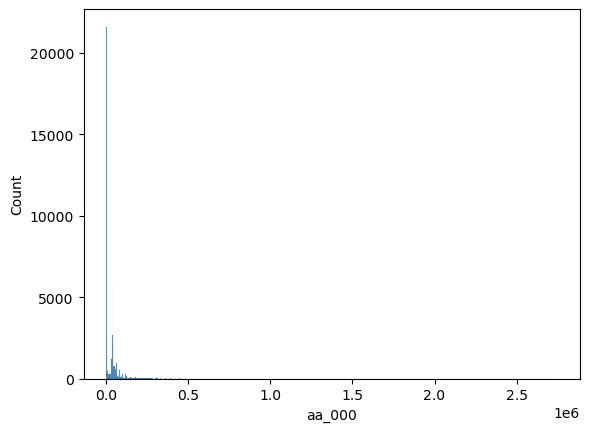

In [18]:
sns.histplot(data = new_dataset, x = "aa_000") 

In [19]:
new_dataset.corr().round(2)

C:\Users\sertacbattal\AppData\Local\Temp\ipykernel_33824\502574347.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_dataset.corr().round(2)


,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
aa_000,1.00,0.03,-0.03,-0.0,0.06,0.09,0.02,0.14,0.29,0.50,...,0.74,0.74,0.72,0.73,0.73,0.61,0.47,0.25,0.02,0.04
ab_000,0.03,1.00,-0.01,0.0,0.03,0.04,0.00,0.01,0.02,0.03,...,0.02,0.04,0.03,0.03,0.02,0.01,0.00,0.00,0.05,0.10
ac_000,-0.03,-0.01,1.00,-0.0,-0.00,-0.01,0.02,-0.00,-0.02,-0.04,...,-0.01,-0.01,-0.01,-0.01,-0.02,-0.03,0.02,0.02,-0.01,0.01
ad_000,-0.00,0.00,-0.00,1.0,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
ae_000,0.06,0.03,-0.00,-0.0,1.00,0.82,-0.00,-0.00,0.01,0.03,...,0.02,0.02,0.02,0.04,0.09,0.05,-0.01,-0.01,0.07,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ee_007,0.61,0.01,-0.03,-0.0,0.05,0.07,0.00,0.04,0.18,0.51,...,0.45,0.45,0.44,0.38,0.55,1.00,0.22,0.06,-0.00,0.00
ee_008,0.47,0.00,0.02,-0.0,-0.01,-0.01,-0.00,0.00,0.01,0.02,...,0.45,0.48,0.46,0.41,0.37,0.22,1.00,0.71,-0.01,-0.00
ee_009,0.25,0.00,0.02,-0.0,-0.01,-0.01,-0.00,-0.00,-0.01,-0.02,...,0.23,0.24,0.22,0.19,0.16,0.06,0.71,1.00,-0.00,-0.00
ef_000,0.02,0.05,-0.01,-0.0,0.07,0.11,-0.00,0.00,0.01,0.02,...,0.01,0.02,0.01,0.05,0.01,-0.00,-0.01,-0.00,1.00,0.28


In [20]:
matrix = new_dataset.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))

C:\Users\sertacbattal\AppData\Local\Temp\ipykernel_33824\3861761015.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = new_dataset.corr().round(2)


<Axes: >

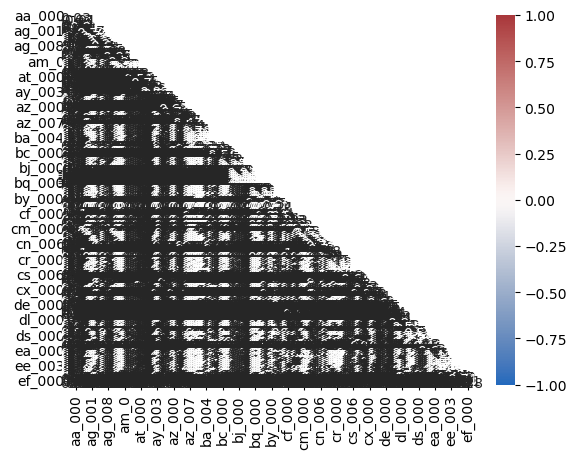

In [21]:
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, cmap='vlag', mask=mask)

<Axes: >

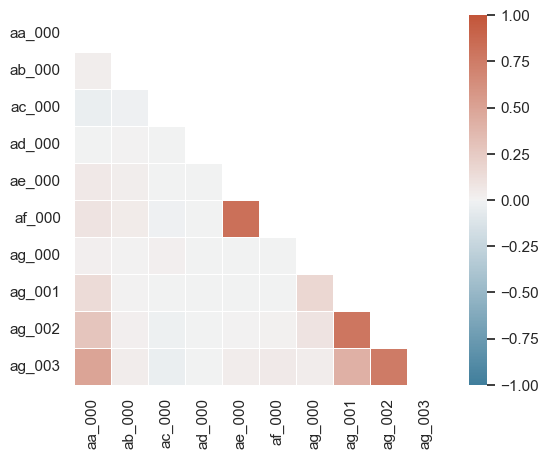

In [22]:
sns.set_theme(style="white")

# Generate a large random dataset
d = pd.DataFrame(data=new_dataset,columns=("aa_000","ab_000","ac_000","ad_000","ae_000","af_000","ag_000","ag_001","ag_002","ag_003"))

# Compute the correlation matrix
#corr = d.corrwith(new_dataset["class"])
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

## Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": 1})

In [23]:
new_dataset["class"].unique()

array(['neg', 'pos'], dtype=object)

In [24]:
new_dataset["class"].unique()

array(['neg', 'pos'], dtype=object)

###### Check all column unique values

In [25]:
column_list = new_dataset.columns.values.tolist()
for column_name in column_list:
      print(new_dataset[column_name].unique())

['neg' 'pos']
[ 76698  33058  41040 ...  83818  16978 153002]
[  0.7131885   0.          2.          4.          6.          8.
  18.         10.         12.         16.        204.         24.
 134.         90.         26.         14.         34.         52.
  20.         22.         30.         36.        100.         48.
  58.         32.         28.         44.         46.         68.       ]
[2.13070644e+09 0.00000000e+00 2.28000000e+02 ... 8.97400000e+03
 1.23514000e+05 2.60200000e+03]
[2.80000e+02         nan 1.00000e+02 ... 5.28600e+03 3.60800e+03
 1.94868e+05]
[0.0000e+00 1.6000e+01 1.0400e+02        nan 2.0000e+00 2.2200e+02
 4.0000e+00 2.9000e+02 1.2860e+03 1.7000e+02 6.0000e+00 8.0600e+02
 1.4640e+03 2.7400e+02 1.8000e+01 8.0000e+00 3.4200e+02 6.4000e+01
 3.4000e+01 1.9200e+02 1.4400e+02 1.7600e+02 1.5120e+03 1.2000e+02
 5.8000e+01 1.1400e+02 4.6000e+02 1.2000e+01 1.1200e+02 1.3140e+03
 2.0000e+01 5.5000e+02 3.6000e+01 1.4240e+03 1.8000e+02 3.2400e+02
 2.0400e+02 2.5400e+02

[287230. 154298. 254892. ...   8610. 287818. 244150.]
[310246. 137280. 189596. ... 157234. 580332.   2990.]
[681504. 138668. 135758. ... 168460. 270232. 151218.]
[1118814.  165908.  103552. ...  496786.  552874.  224530.]
[   3574.  229652.   81666. ... 1264596. 1027168.  191788.]
[0.0000e+00 8.7082e+04 4.6000e+01 ... 2.4200e+03 1.1664e+04 5.2140e+03]
[0.00000e+00 4.70800e+03 3.40000e+01 ... 6.40368e+05 3.51596e+05
 2.06532e+05]
[ 6700214.  3646660.  2673338. ... 10845228.  6159728.  3076406.]
[    0.    86.   128. ... 23994.  8776.  6112.]
[1.0000e+01 4.5400e+02 2.0200e+02 ... 2.4044e+04 3.3560e+03 3.0900e+03]
[  108.   364.   576. ... 14356.  5002. 10334.]
[  50.  350.    4. ... 1276. 2254. 1016.]
[2551696. 1393352. 1234132. ...   56982. 2634394. 1235850.]
[ 97518.  49028.  28804. ...  41812. 129760. 105862.]
[947550. 688314. 160176. ...  14404. 580084. 310028.]
[ 799478.  392208.  139730. ...  678792. 1032454.  260378.]
[330760. 341420. 137160. ... 313640. 286840. 302700.]
[353400. 

[267998. 164860.  56362. ...  48640. 333922.  81228.]
[521832. 350066. 149726. ...   9664. 700650. 195104.]
[428776. 272956. 100326. ... 425276. 388092. 284388.]
[4015854. 1837600. 1744838. ...   40190. 3174954. 2064878.]
[ 895240.  301242.  488302. ...   75776. 1312814.  233308.]
[26330.  9148. 16682. ... 38298. 24104. 36428.]
[1.180000e+02 2.200000e+01 2.460000e+02 0.000000e+00 2.040000e+02
 8.600000e+01 3.520000e+02 1.700000e+02 9.600000e+01 3.420000e+02
 3.840000e+02 2.000000e+00 1.040000e+02 4.000000e+01 5.000000e+01
 2.800000e+02 1.680000e+02 1.600000e+01 2.340000e+02 1.400000e+01
 6.800000e+01 1.880000e+02 4.800000e+01 9.400000e+02 4.000000e+00
 7.800000e+01 1.056000e+03 2.400000e+01 3.200000e+01 8.000000e+01
 7.600000e+01 2.000000e+01 2.140000e+02 2.600000e+01 1.640000e+02
 4.400000e+01 1.900000e+02          nan 3.000000e+01 2.960000e+02
 1.500000e+02 1.320000e+02 1.760000e+02 3.700000e+02 9.180000e+02
 2.940000e+02 8.800000e+01 5.520000e+02 3.200000e+02 1.300000e+02
 5.200000e

##### class values change, neg to 0, pos to 1

In [26]:
new_dataset['class'].replace('neg', 0, inplace = True)
new_dataset['class'].replace('pos', 1,  inplace = True)

In [27]:
new_dataset["class"].unique()

array([0, 1], dtype=int64)

<Axes: >

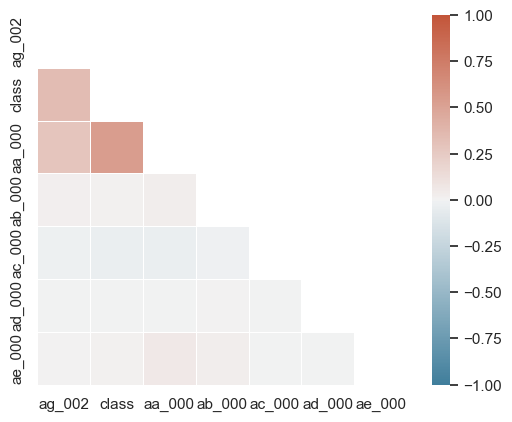

In [28]:
sns.set_theme(style="white")

# Generate a large random dataset
d = pd.DataFrame(data=new_dataset,columns=("ag_002","class","aa_000","ab_000","ac_000","ad_000","ae_000"))

# Compute the correlation matrix
#corr = d.corrwith(new_dataset["class"])
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

## Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": 1})

In [29]:
new_dataset.corr().round(2)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
class,1.00,0.54,0.02,-0.04,-0.0,0.01,0.02,0.01,0.19,0.34,...,0.45,0.43,0.42,0.49,0.42,0.16,0.24,0.12,0.02,0.02
aa_000,0.54,1.00,0.03,-0.03,-0.0,0.06,0.09,0.02,0.14,0.29,...,0.74,0.74,0.72,0.73,0.73,0.61,0.47,0.25,0.02,0.04
ab_000,0.02,0.03,1.00,-0.01,0.0,0.03,0.04,0.00,0.01,0.02,...,0.02,0.04,0.03,0.03,0.02,0.01,0.00,0.00,0.05,0.10
ac_000,-0.04,-0.03,-0.01,1.00,-0.0,-0.00,-0.01,0.02,-0.00,-0.02,...,-0.01,-0.01,-0.01,-0.01,-0.02,-0.03,0.02,0.02,-0.01,0.01
ad_000,-0.00,-0.00,0.00,-0.00,1.0,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ee_007,0.16,0.61,0.01,-0.03,-0.0,0.05,0.07,0.00,0.04,0.18,...,0.45,0.45,0.44,0.38,0.55,1.00,0.22,0.06,-0.00,0.00
ee_008,0.24,0.47,0.00,0.02,-0.0,-0.01,-0.01,-0.00,0.00,0.01,...,0.45,0.48,0.46,0.41,0.37,0.22,1.00,0.71,-0.01,-0.00
ee_009,0.12,0.25,0.00,0.02,-0.0,-0.01,-0.01,-0.00,-0.00,-0.01,...,0.23,0.24,0.22,0.19,0.16,0.06,0.71,1.00,-0.00,-0.00
ef_000,0.02,0.02,0.05,-0.01,-0.0,0.07,0.11,-0.00,0.00,0.01,...,0.01,0.02,0.01,0.05,0.01,-0.00,-0.01,-0.00,1.00,0.28


<Axes: >

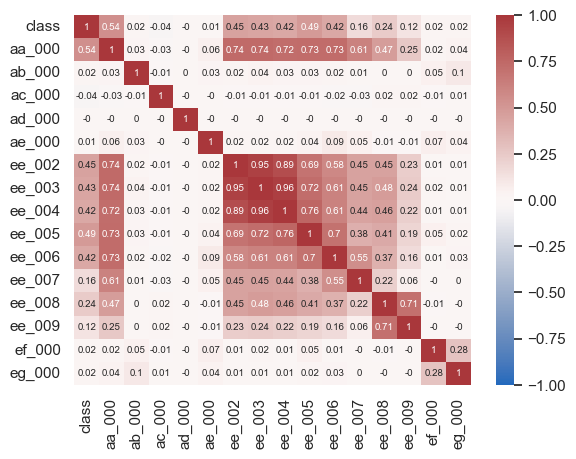

In [30]:
d = pd.DataFrame(data=new_dataset,columns=("class","aa_000","ab_000","ac_000","ad_000","ae_000","ee_002","ee_003","ee_004","ee_005","ee_006","ee_007","ee_008","ee_009","ef_000","eg_000"))
sns.heatmap(d.corr().round(2), annot=True, vmin=-1, vmax=1, center=0, cmap='vlag', annot_kws={'fontsize':7})

# Using sns.pairplot for analysing
### Crate new data set from new_dataset for testing, remove much cloumn

In [31]:
test_dataset = new_dataset.drop(new_dataset.iloc[:, 3:170], axis=1)

In [32]:
test_dataset

,class,aa_000,ab_000,eg_000
0,0,76698,0.713189,0.0
1,0,33058,0.713189,0.0
2,0,41040,0.713189,0.0
3,0,12,0.000000,32.0
4,0,60874,0.713189,0.0
...,...,...,...,...
59995,0,153002,0.713189,0.0
59996,0,2286,0.713189,0.0
59997,0,112,0.000000,0.0
59998,0,80292,0.713189,0.0


In [33]:
# sns.pairplot(test_dataset)

### implementation PCA

In [34]:
from sklearn.decomposition import PCA

In [35]:
new_dataset.isnull().sum()

class         0
aa_000        0
ab_000        0
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

In [36]:
new_dataset2 = new_dataset.fillna(0)

In [37]:
new_dataset2.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

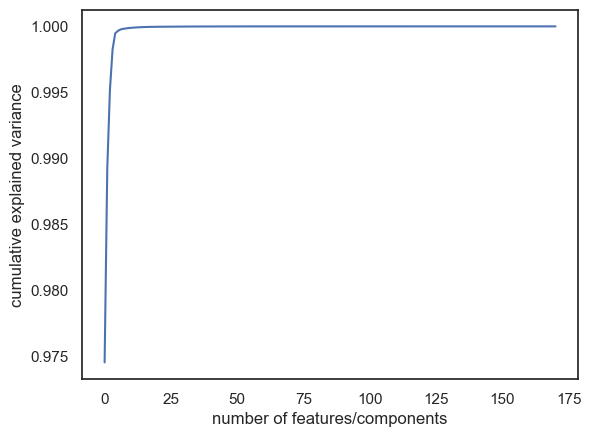

In [39]:
pca = PCA().fit(new_dataset2) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of features/components') 
plt.ylabel('cumulative explained variance');

## Use 10 columns for PCA becouse ebout grapf ->0.995

In [40]:
pca = PCA(10)

In [41]:
projected = pca.fit_transform(new_dataset2)

In [42]:
projected.shape

(60000, 10)

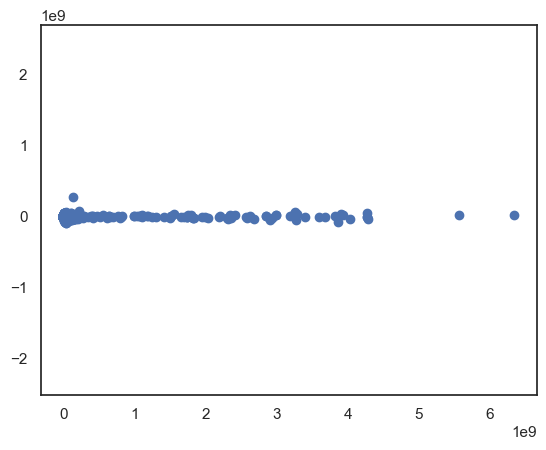

In [58]:
plt.scatter(projected[ : ,1],projected[ : ,9]);
plt.axis("equal");

In [47]:
pca.explained_variance_

array([6.03372981e+17, 9.11826906e+15, 3.68450348e+15, 1.90981764e+15,
       7.52763797e+14, 1.09193397e+14, 7.12198302e+13, 2.85746910e+13,
       1.94112321e+13, 1.62849975e+13])